In [1]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser
import pandas as pd
import re
from collections import Counter

In [2]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [3]:
import kiwipiepy
print(kiwipiepy.__version__)

0.20.4


In [4]:
from konlpy.tag import Okt

def extract_keywords(text):
    okt = Okt()
    words = okt.pos(text, stem=True)  # Extract words with their part-of-speech tags, stem verbs/adjectives
    keywords = [word for word, tag in words if (tag in ['Noun', 'Adjective']) and len(word)>=2]  # Filter nouns, verbs, adjectives
    return list(set(keywords))  # Remove duplicates and return as a list

In [5]:
def noun_extractor(text):
    return [token.form for token in kiwi.tokenize(text) if len(token.form) > 1 and token.tag.startswith('N')]
    
def keyword_extractor(text):
    results = []
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if (len(token) != 1):
            results.append(token)
    return ' '.join(results)
    

In [6]:
kiwi.add_user_word("Íµ≠ÎØºÏùòÌûò", "NNP") 

True

In [7]:
def remove_words_between_tags(text):
    # Define the pattern to match words between "<" and ">"
    pattern = r'<[^>]*>'
    
    # Use re.sub to replace all matches of the pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.replace('&quot;', ' ')
    return cleaned_text

In [8]:
def get_youtube_comments(api_key, video_id):
    # Set up the YouTube Data API service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Initial request to get the first page of comments
    comments_request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        maxResults=100  # Adjust as needed, max is 100
    )

    all_comments = []

    while comments_request:
        comments_response = comments_request.execute()

        # Extract comments and metadata from the response
        for comment_thread in comments_response['items']:
            comment_data = {
                'Comment': comment_thread['snippet']['topLevelComment']['snippet']['textDisplay'],
                'Author': comment_thread['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'LikeCount': comment_thread['snippet']['topLevelComment']['snippet']['likeCount'],
                'PublishedAt': comment_thread['snippet']['topLevelComment']['snippet']['publishedAt'],
            }
            all_comments.append(comment_data)

        # Check if there are more pages of comments
        comments_request = youtube.commentThreads().list_next(comments_request, comments_response)

    return all_comments

In [9]:
if __name__ == "__main__":
    # Replace 'YOUR_API_KEY' with your actual YouTube Data API key
    api_key = '******'

    # Replace 'VIDEO_ID' with the actual ID of the YouTube video
    video_id = 'EaGNjgTt3co'
    # blU7Mxv8RaY

    comments = get_youtube_comments(api_key, video_id)

    # Create a Pandas DataFrame
    df = pd.DataFrame(comments)

    # Display the DataFrame
    # print(df)

In [10]:
#df = pd.read_csv("TrumpZelensky.csv")

In [11]:
df = df.sort_values(by=['LikeCount'], ascending=False)

In [12]:
%matplotlib inline 
import string
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
pd.options.mode.chained_assignment = None
#from nltk.corpus import stopwords
# list of stopwords like articles, preposition
#stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter
import datetime

In [13]:
df['Comment'] = df['Comment'].apply(remove_words_between_tags)
tokenized = df['Comment'].apply(noun_extractor)
nouns = df['Comment'].apply(noun_extractor)

In [14]:
tokenized

2286                         [Ïñ∏Î°†ÏÇ¨, Î∞©ÏÜ°Íµ≠, ÏÇ¨Ïã§, Î≥∏Ïù∏, Ìù¨ÎßùÏÇ¨Ìï≠, Î≥¥ÎèÑ]
2231    [ÎØ∏Íµ≠, Ïñ∏Î°†, Ìä∏ÎüºÌîÑ, Ìï¥Î¶¨Ïä§, Î∞ïÎπô, Íµ≠ÎÇ¥, Ïñ∏Î°†, Ìï¥Î¶¨Ïä§, ÏïïÏäπ, ÏòàÏÉÅ, ÎØ∏Íµ≠...
1935                                     [Ïù¥Î≤à, ÌïúÍµ≠, Ïñ∏Î°†, ÏßÑÏã§]
1704                            [ÏûêÍ∏∞, Ïó≠ÎåÄ, ÏπòÏó¥, Ï†ëÏ†Ñ, Î∞ïÎπô, Îî¥ÏÜåÎ¶¨]
2296                                        [Íµ≠ÎÇ¥, Ïñ∏Î°†ÏÇ¨, ÏàòÏ§Ä]
                              ...                        
972                                                    []
970                                  [ÎØ∏Íµ≠, Î¨∏Ìôî, ÎØ∏Íµ≠, ÏãúÎØº, ÌñâÎèô]
968                                              [ÌôòÏú®, ÎèåÌåå]
967                              [Î∞±Ïù∏, Ïö∞ÏõîÏ£ºÏùò, Ï≤≠ÎÖÑ, ÌùëÏù∏, ÌûàÏä§Ìå®Îãâ]
1150                                  [ÎØ∏Íµ≠Ïù∏, Ìï¥Î¶¨Ïä§, Ìä∏ÎüºÌîÑ, Í∞ÄÎä•]
Name: Comment, Length: 2300, dtype: object

In [15]:
nouns

2286                         [Ïñ∏Î°†ÏÇ¨, Î∞©ÏÜ°Íµ≠, ÏÇ¨Ïã§, Î≥∏Ïù∏, Ìù¨ÎßùÏÇ¨Ìï≠, Î≥¥ÎèÑ]
2231    [ÎØ∏Íµ≠, Ïñ∏Î°†, Ìä∏ÎüºÌîÑ, Ìï¥Î¶¨Ïä§, Î∞ïÎπô, Íµ≠ÎÇ¥, Ïñ∏Î°†, Ìï¥Î¶¨Ïä§, ÏïïÏäπ, ÏòàÏÉÅ, ÎØ∏Íµ≠...
1935                                     [Ïù¥Î≤à, ÌïúÍµ≠, Ïñ∏Î°†, ÏßÑÏã§]
1704                            [ÏûêÍ∏∞, Ïó≠ÎåÄ, ÏπòÏó¥, Ï†ëÏ†Ñ, Î∞ïÎπô, Îî¥ÏÜåÎ¶¨]
2296                                        [Íµ≠ÎÇ¥, Ïñ∏Î°†ÏÇ¨, ÏàòÏ§Ä]
                              ...                        
972                                                    []
970                                  [ÎØ∏Íµ≠, Î¨∏Ìôî, ÎØ∏Íµ≠, ÏãúÎØº, ÌñâÎèô]
968                                              [ÌôòÏú®, ÎèåÌåå]
967                              [Î∞±Ïù∏, Ïö∞ÏõîÏ£ºÏùò, Ï≤≠ÎÖÑ, ÌùëÏù∏, ÌûàÏä§Ìå®Îãâ]
1150                                  [ÎØ∏Íµ≠Ïù∏, Ìï¥Î¶¨Ïä§, Ìä∏ÎüºÌîÑ, Í∞ÄÎä•]
Name: Comment, Length: 2300, dtype: object

In [16]:
df['Tokens'] = tokenized

In [17]:
#from openai import OpenAI
#import os
#client = OpenAI(api_key='****')
#def getChatGPTSentiment(txt): 
#    chat_completion = client.chat.completions.create(
#    messages=[
#        {
#            "role": "user",
#            #"content": "Is the sentiment of this text positive, negative, or neutral?  Do not give a long answer and just say Positive, Negative, or Neutral.  If you can't determine the sentiment, just say Neutral.  If there is no text to analyze, just say Neutral." + txt,
#            "content": "Provide a sentiment score of this text on the scale of -1 to 1.  Your answer should be a numerical value.  It should contain no text or period." + txt,
#        }
#    ],
#    model="gpt-4o",)

#    output = chat_completion.choices[0].message.content
#    print(output + '\t' + txt)
#    return output

In [18]:
import openai
import time
import concurrent.futures

client = openai.OpenAI(api_key="******")

def getChatGPTSentiment(txt):
    """Send a single API request and return sentiment score."""
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": f"Provide a sentiment score of this text on the scale of -1 to 1.  Your answer should be a numerical value.  It should contain no text or period. If you don't know the answer, just give me 0: {txt}"}]
        )
        return response.choices[0].message.content if response.choices else None
    except Exception as e:
        print(f"Error processing: {txt}\nError: {e}")
        return None  # Return None if there's an error

def getChatGPTSentimentParallel(comments, max_workers=10):
    """Process sentiment analysis in parallel for a list of comments."""
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Submit all tasks at once
        future_to_text = {executor.submit(getChatGPTSentiment, txt): txt for txt in comments}
        
        for future in concurrent.futures.as_completed(future_to_text):
            results.append(future.result())  # Collect results

    return results

In [19]:
batch_size = 50  # Increase this for better performance
max_threads = 10  # Adjust based on system capability

# Process comments in parallel batches
sentiment_scores = []
count = 1
for i in range(0, len(df), batch_size):
    batch = df['Comment'].iloc[i:i + batch_size].tolist()
    batch_scores = getChatGPTSentimentParallel(batch, max_workers=max_threads)
    sentiment_scores.extend(batch_scores)
    print("Batch " + str(count) + " Done.")
    count += 1

# Assign back to DataFrame
df['Sentiment'] = sentiment_scores

Batch 1 Done.
Batch 2 Done.
Batch 3 Done.
Batch 4 Done.
Batch 5 Done.
Batch 6 Done.
Batch 7 Done.
Batch 8 Done.
Batch 9 Done.
Batch 10 Done.
Batch 11 Done.
Batch 12 Done.
Batch 13 Done.
Batch 14 Done.
Batch 15 Done.
Batch 16 Done.
Batch 17 Done.
Batch 18 Done.
Batch 19 Done.
Batch 20 Done.
Batch 21 Done.
Batch 22 Done.
Batch 23 Done.
Batch 24 Done.
Batch 25 Done.
Batch 26 Done.
Batch 27 Done.
Batch 28 Done.
Batch 29 Done.
Batch 30 Done.
Batch 31 Done.
Batch 32 Done.
Batch 33 Done.
Batch 34 Done.
Batch 35 Done.
Batch 36 Done.
Batch 37 Done.
Batch 38 Done.
Batch 39 Done.
Batch 40 Done.
Batch 41 Done.
Batch 42 Done.
Batch 43 Done.
Batch 44 Done.
Batch 45 Done.
Batch 46 Done.


In [22]:
#df[df['Sentiment'] == '0ÏûÖÎãàÎã§']
#df.loc[3237, "Sentiment"] = "0"

In [23]:
df['Sentiment'] = df.Sentiment.astype('float')

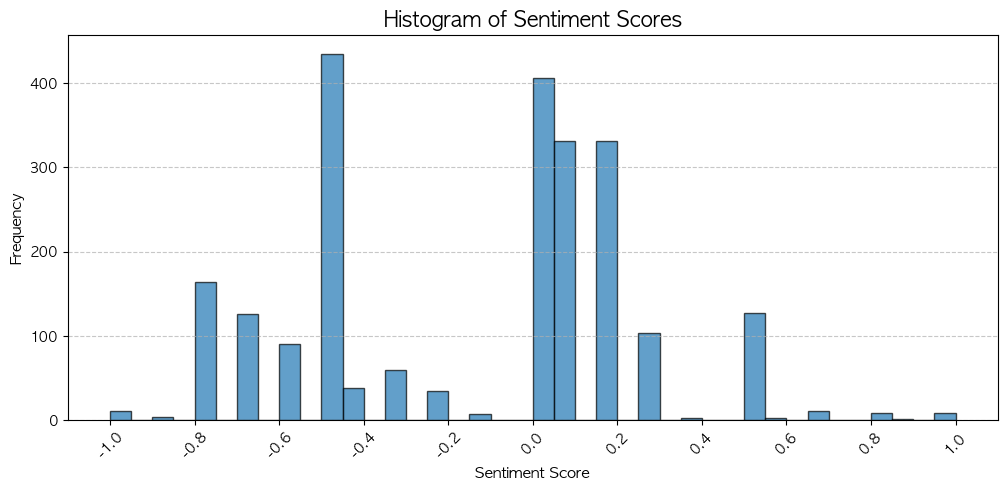

In [24]:
# Set Apple Gothic as the default font
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # Fixes negative sign issue

# Create histogram and capture bin edges
plt.figure(figsize=(12, 5))
counts, bins, patches = plt.hist(df['Sentiment'], bins=40, edgecolor='black', alpha=0.7)

# Define evenly spaced x-ticks including -1, 0, and 1
xticks_labels = np.linspace(-1, 1, num=11)  # Generates 11 evenly spaced ticks from -1 to 1

plt.xticks(xticks_labels, rotation=45, fontsize=10)  # Rotate for better readability
plt.yticks(fontsize=10)

plt.xlabel('Sentiment Score', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Histogram of Sentiment Scores', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Flatten the list of lists and count occurrences
all_keywords = [word for sublist in df['Tokens'] for word in sublist]
keyword_counts = Counter(all_keywords)

# Convert to DataFrame for better visualization
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency'])

# Sort by frequency in descending order
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

# Limit to the top 30 most frequent keywords
keyword_df_top30 = keyword_df.head(30)

In [26]:
keyword_df_top30

Keyword  Frequency
7        Ïñ∏Î°†        979
8       Ìä∏ÎüºÌîÑ        621
19       ÌïúÍµ≠        540
6        ÎØ∏Íµ≠        506
9       Ìï¥Î¶¨Ïä§        264
10       Î∞ïÎπô        232
78       Ï¢åÌåå        177
43       Ïö∞Î¶¨        162
107     ÎåÄÌÜµÎ†π        156
205     ÎØºÏ£ºÎãπ        152
5        Î≥¥ÎèÑ        151
85       ÎÇòÎùº        151
103    Ïö∞Î¶¨ÎÇòÎùº        148
175      Îâ¥Ïä§        136
60       ÏÑ†Í±∞        131
72       Íµ≠ÎØº        130
0       Ïñ∏Î°†ÏÇ¨        125
126      ÏÇ¨Îûå        105
11       Íµ≠ÎÇ¥        105
27       ÏÑ†Îèô        100
186      ÎãπÏÑ†         99
61       Î∞©ÏÜ°         91
52       Ïó¨Î°†         90
76       ÏÉùÍ∞Å         89
160      Î∂ÄÏ†ï         85
53       Ï°∞Ïûë         81
26       ÏàòÏ§Ä         81
95       Ï†ÑÏüÅ         76
108     Î∞îÏù¥Îì†         74
276     Ïì∞Î†àÍ∏∞         72

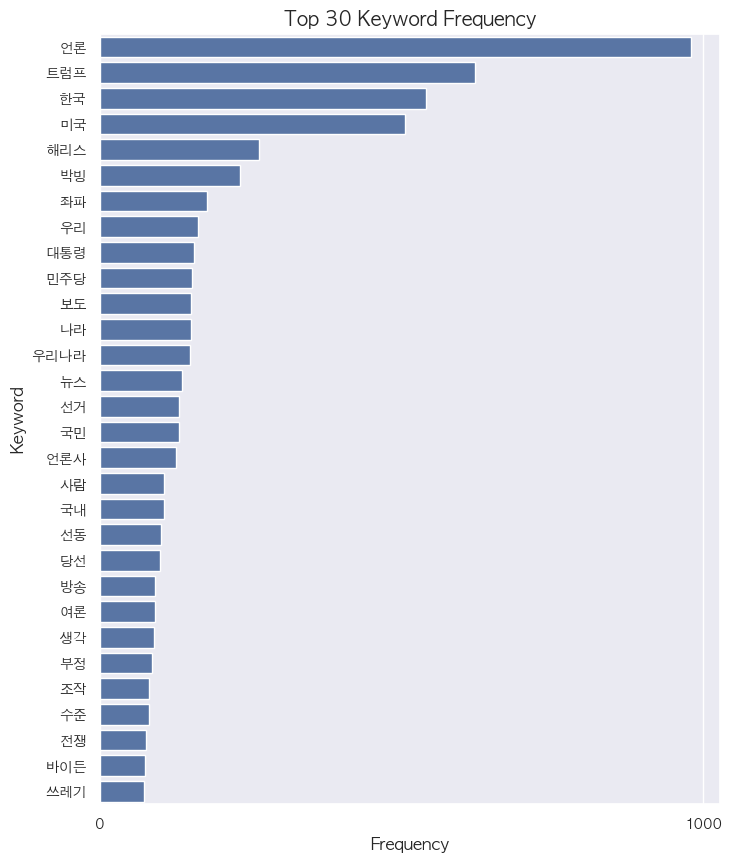

In [27]:
# Setting Seaborn style and Matplotlib parameters
sns.set(style="darkgrid", font='AppleGothic', font_scale=5)

# Plot horizontal barplot using Seaborn
plt.figure(figsize=(8, 10))
sns.barplot(x='Frequency', y='Keyword', data=keyword_df_top30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add title and labels
plt.title('Top 30 Keyword Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keyword', fontsize=12)

# Show plot
plt.show()

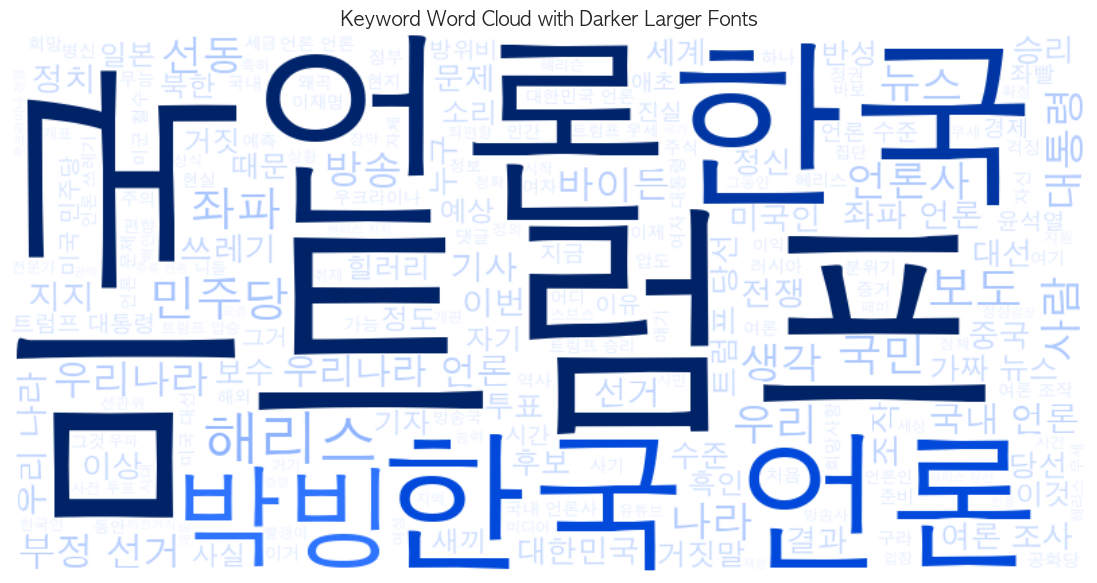

In [28]:
from wordcloud import WordCloud

all_keywords_text = " ".join([word for sublist in df['Tokens'] for word in sublist])

# Define a custom color function where bigger words are darker and smaller words are lighter
def darken_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(220, 100%, {max(20, 100 - font_size // 2)}%)"  # Darker for larger words

# Generate word cloud with improved visibility
wordcloud = WordCloud(
    font_path="/Library/Fonts/AppleGothic.ttf",  # Change this to AppleGothic.ttf if running locally on macOS
    width=800, height=400,
    background_color="white",
    color_func=darken_color_func,  # Apply custom color function
    contour_color='black',  # Outline for better visibility
    contour_width=1.5
).generate(all_keywords_text)

# Plot word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Keyword Word Cloud with Darker Larger Fonts", fontsize=14)
plt.show()

In [30]:
df.to_csv("TrumpVictory.csv", index=False, encoding="utf-8-sig")

In [31]:
df.head(20)

Comment              Author  \
2286        Ïñ∏Î°†ÏÇ¨ Î∞©ÏÜ°Íµ≠ÏùÄ ÏÇ¨Ïã§ÏùÑ ÏïåÎ¶¨ÎäîÍ≤å ÏïÑÎãàÍ≥† Î≥∏Ïù∏Îì§ Ìù¨ÎßùÏÇ¨Ìï≠ÏùÑ Î≥¥ÎèÑÌïúÍ±∞ÏßÄ Î≠ê „Öã„Öã„Öã              @ÏïºÎßåÏùòÏÇ¨Ìöå   
2231  ÎØ∏Íµ≠ Ïñ∏Î°†  Ìä∏ÎüºÌîÑ Ìï¥Î¶¨Ïä§ Ï¥àÎ∞ïÎπô  -&gt; Íµ≠ÎÇ¥ Ïñ∏Î°†  Ìï¥Î¶¨Ïä§ ÏïïÏäπ ÏòàÏÉÅ ÎØ∏Íµ≠ ...         @Kim_Doohan   
1935                     Ïù¥Î≤àÏóê ÎäêÍºàÎã§ ÌïúÍµ≠Ïñ∏Î°†ÏùÄ ÏßÑÏã§ÏùÑ ÎßêÌïòÎ†§ÌïòÏßÄ ÏïäÎäîÎã§Îäî Í±∏          @SuGga-s6f   
1704  sbs ÏûêÍ∏∞Îì§ÎèÑ Ïó≠ÎåÄ Í∞ÄÏû• ÏπòÏó¥Ìïú Ï†ëÏ†Ñ, Ï¥àÎ∞ïÎπô, ÎÅùÎÇòÎèÑ ÎÅùÎÇúÍ≤å ÏïÑÎãàÎã§ Ïù¥Îî¥ÏÜåÎ¶¨ÎÇò ...     @yimdongjoo4427   
2296                                       Íµ≠ÎÇ¥ Ïñ∏Î°†ÏÇ¨ ÏàòÏ§Ä Ïù¥ÏßÄ                @ÏãúÎ¶¨Ïãú   
1452  Ïñ∏Î°†Ïóê ÏÑ†ÎèôÏù¥ Ïù¥ÎûòÏÑú Î¨¥ÏÑúÏö¥Í±∞Îã§.. Î≥¥Ïó¨ Ï£ºÍ≥† Ïã∂ÏùÄ Í±∞Îßå Î≥¥Ïó¨Ï£ºÎäî  Ïñ∏Î°†Ïù¥ ÎåÄÌïúÎØºÍµ≠...               @ÎßéÏùÄÏÉùÍ∞Å   
2245  Î∞ïÏ¢ÖÌõàÏùò ÏßÄÏãùÌïúÎ∞©ÏóêÏÑú Ï§ÑÍ≥ß ÏñòÍ∏∞ ÌñàÎäîÎç∞.. Îäò  Ìä∏ÎüºÌîÑÍ∞Ä ÏïûÏÑúÍ≥† ÏûàÏóàÎã§Í≥†..  Ï¥àÎ∞ï...          @Namkisoon   
2202                                          ÌïúÍµ≠Ïñ∏Î°†Ïùò ÌòÑÏ£ºÏÜå      @rivermoon6164   
888   Íµ≠ÎÇ¥ Ïñ∏Î°†ÏÇ¨ Î≥¥ÎèÑÍµ≠ Í∏∞ÏûêÎì§ Íµ≠Ïû•Îì§ ÌäπÌûà Ï†ïÏπòÎ∂Ä Íµ≠Ï†úÎ∂Ä Îã§ ÏÇ¨ÌëúÎÇ¥Îùº ÏßÑÏßú „Öã„Öã„Öã Ï≤òÏùå...        @November441   
1224  Ïñ¥ÎäêÎàÑÍ∞Ä Í∑∏Îü∞ ÎåìÍ∏ÄÏùÑ Îã¨ÏïòÎäîÎç∞...Ï¥àÎ∞ïÎπôÏù¥ ÏïÑÎãàÎùº Ï≤òÏùåÎ∂ÄÌÑ∞ Ìï¥Î¶¨Ïä§Í∞Ä Ìä∏ÎüºÌîÑÎ•º ÏïûÏÑ†Ï†Å...           @woop5019   
2291                                Ïö∞Î¶¨ Ïñ∏Î°†Ïù¥ÎÇò Í∑∏Î†áÍ≤å Î≥¥ÎèÑÌñàÏßÄ...     @sangkyukim9625   
2199      ÏöîÏ¶ò Ïñ∏Î°†ÏùÄ Í∑∏ÎÉ• Ï£ÑÎã§ Ìù¨ÎßùÏÇ¨Ìï≠ ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö©Îßå Î≥¥ÎèÑ, Î≥∏ÏßàÏùÑ ÏûäÏùÄÏßÄ Ïò§ÎûòÏûÑ...            @Î™ÖÌù¨Ï§Ä-i1e   
2294                                      ÌïúÍµ≠Ïñ∏Î°†Îßå Î∞ïÎπôÏù¥ÏóàÏñ¥..           @7202-s5p   
1470  „Öã„Öã„ÖãÌä∏ÎüºÌîÑÍ∞Ä Ï≤òÏùåÎ∂ÄÌÑ∞ ÎåÄÏÑ∏ÏòÄÎäîÎç∞ Ïñ∏Î°†ÏÇ¨Îì§ ÌóõÏÜåÎ¶¨Ïò§Ïßê „Öã„Öã„Öã„Öã„ÖãÏÇ¨Ïã§ÏùÑ Î≥¥ÎèÑÌï¥ÏïºÏßÄ ÏßÄ...             @ÎÇòÎèô-x7r   
2298     Ïó¨Î°†Ï°∞ÏûëÏóê ÌùîÎì§Î¶¨ÏßÄ ÏïäÎäî ÎØ∏Íµ≠Ïù∏Í≥º ÏÑ†Í±∞Ïù∏Îã® Ï†úÎèÑÏóê Í≤ΩÏùòÎ•º ÌëúÌïúÎã§. Ìä∏ÎüºÌîÑ Ï∂ïÌïòÌïúÎã§.          @UUIII-z4f   
2211             SBS Ïπ¥ÎßêÎùº Ïù¥Í∏¥Îã§Í≥† ÏÑ†Í±∞ ÎÇ¥ÎÇ¥ Îñ†Îì§ÏßÄ ÏïäÏïòÎÇò?. Ï∞∏ Î∞©ÏÜ°ÌïòÍ∏∞ ÏâΩÎÑ§  @fairy-tale-teller   
705   Îã® ÌïúÏàúÍ∞ÑÎèÑ Ìï¥Î¶¨Ïä§Îäî Ìä∏ÎüºÌîÑÎ•º ÏÉÅÎåÄÎ°ú ÏïûÏÑúÍ∏∞Îäî Ïª§ÎÖï ÎπÑÎπà Ï†ÅÎèÑ ÏóÜÏóàÎã§K-Ïñ∏Î°†Ïù¥ Îòê ...           @JJ-zf3cy   
1405                 Ï¥àÎ∞ïÎπôÏùÄ ÎãàÎì§Ïù¥Íæ∏ÎØºÍ±∞Í≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Ïó¨Î°†Ï°∞ÏÇ¨ÏóêÏÑú Ìä∏ÎüºÌîÑÍ∞Ä Ïù¥Í≤®ÏôîÏñ¥           @SG-wf8sn   
821   ÌïúÍµ≠ Ïñ∏Î°† = Ïú†ÌäúÎ∏å ÏÇ¨Ïù¥Î≤ÑÎ†âÏπ¥ÌïúÍµ≠ Í∏∞ÏûêÎì§ÏùÄ ÏÇ¨Ïù¥Î≤ÑÎ†âÏπ¥ ÏöïÌïòÏßÄÎßàÎùº ÎÑàÎÑ§Í∞Ä ÏÇ¨Ïù¥Î≤ÑÎ†âÏπ¥...            @Ïú†Ìà¨Î∏åÌîÑÎ¶¨ÎØ∏ÏóÑ   
2232                      Íµ≠ÎÇ¥Ïô∏ Ïñ∏Î°†ÏÇ¨Îì§ Ìï¥Î¶¨Ïä§Ïù¥Í∏¥Îã§Ìï¥ÎÜìÍ≥† ÎßâÏÉÅÏó¥Ïñ¥Î≥¥Îãà Ìä∏ÎüºÌîÑ            @jsy0630   

      LikeCount           PublishedAt  \
2286       4841  2024-11-06T09:16:17Z   
2231       4071  2024-11-06T09:30:00Z   
1935       3453  2024-11-06T10:11:52Z   
1704       2619  2024-11-06T10:43:42Z   
2296       2137  2024-11-06T09:13:57Z   
1452       1624  2024-11-06T11:22:14Z   
2245       1232  2024-11-06T09:27:04Z   
2202       1171  2024-11-06T09:33:57Z   
888        1163  2024-11-06T13:38:54Z   
1224        994  2024-11-06T12:06:01Z   
2291        883  2024-11-06T09:15:06Z   
2199        808  2024-11-06T09:34:03Z   
2294        701  2024-11-06T09:14:05Z   
1470        681  2024-11-06T11:19:54Z   
2298        547  2024-11-06T09:13:10Z   
2211        501  2024-11-06T09:32:32Z   
705         488  2024-11-06T15:16:00Z   
1405        434  2024-11-06T11:29:23Z   
821         392  2024-11-06T14:02:47Z   
2232        363  2024-11-06T09:29:55Z   

                                                 Tokens  Sentiment  
2286                       [Ïñ∏Î°†ÏÇ¨, Î∞©ÏÜ°Íµ≠, ÏÇ¨Ïã§, Î≥∏Ïù∏, Ìù¨ÎßùÏÇ¨Ìï≠, Î≥¥ÎèÑ]        0.0  
2231  [ÎØ∏Íµ≠, Ïñ∏Î°†, Ìä∏ÎüºÌîÑ, Ìï¥Î¶¨Ïä§, Î∞ïÎπô, Íµ≠ÎÇ¥, Ïñ∏Î°†, Ìï¥Î¶¨Ïä§, ÏïïÏäπ, ÏòàÏÉÅ, ÎØ∏Íµ≠...        0.0  
1935                                   [Ïù¥Î≤à, ÌïúÍµ≠, Ïñ∏Î°†, ÏßÑÏã§]        0.2  
1704                      

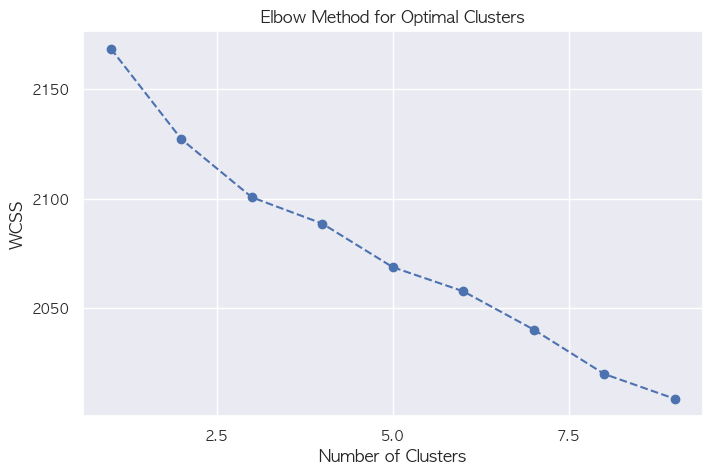

Cluster 0: ['Ï¢åÌåå', 'Ïñ∏Î°†', 'ÎØ∏Íµ≠', 'ÌïúÍµ≠', 'ÏÑ†Îèô', 'Ïö∞Î¶¨ÎÇòÎùº', 'Î≥¥ÎèÑ', 'Îâ¥Ïä§', 'Ìï¥Î¶¨Ïä§', 'Ïö∞Î¶¨']
Cluster 1: ['Ïñ∏Î°†', 'ÌïúÍµ≠', 'ÎØ∏Íµ≠', 'Ïì∞Î†àÍ∏∞', 'Ìä∏ÎüºÌîÑ', 'Ïö∞Î¶¨ÎÇòÎùº', 'Ìï¥Î¶¨Ïä§', 'Íµ≠ÎÇ¥', 'Îâ¥Ïä§', 'Î≥¥ÎèÑ']
Cluster 2: ['Î∞ïÎπô', 'Ïñ∏Î°†', 'Ìä∏ÎüºÌîÑ', 'ÌïúÍµ≠', 'Ìï¥Î¶¨Ïä§', 'ÏÜåÎ¶¨', 'ÎØ∏Íµ≠', 'Ïö∞Î¶¨', 'ÎàÑÍµ¨', 'Ïñ∏Î°†ÏÇ¨']
Cluster 3: ['ÎØ∏Íµ≠', 'Ìä∏ÎüºÌîÑ', 'ÏÑ†Í±∞', 'Ïö∞Î¶¨', 'ÎÇòÎùº', 'Ïñ∏Î°†', 'Î∂ÄÏ†ï', 'ÌïúÍµ≠', 'ÎåÄÌÜµÎ†π', 'ÎØºÏ£ºÎãπ']
Cluster 4: ['Ìä∏ÎüºÌîÑ', 'Ïñ∏Î°†', 'Ìï¥Î¶¨Ïä§', 'ÌïúÍµ≠', 'ÎØ∏Íµ≠', 'Î≥¥ÎèÑ', 'ÎåÄÌÜµÎ†π', 'Ïñ∏Î°†ÏÇ¨', 'Îâ¥Ïä§', 'ÎØºÏ£ºÎãπ']


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Convert token lists to space-separated strings
df['Tokens_str'] = df['Tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tokens_str'])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method for Optimal Clusters', fontsize=12)
plt.show()

# Choose an optimal number of clusters (e.g., 4) based on the elbow method
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display clustered tokens
clustered_tokens = {}
for i in range(optimal_clusters):
    cluster_tokens = df[df['Cluster'] == i]['Tokens'].explode().dropna().tolist()
    most_common_words = [word for word, _ in Counter(cluster_tokens).most_common(10)]
    clustered_tokens[f'Cluster {i}'] = most_common_words

# Print clustered tokens
for cluster, words in clustered_tokens.items():
    print(f"{cluster}: {words}")

In [33]:
df.head()

Comment           Author  \
2286        Ïñ∏Î°†ÏÇ¨ Î∞©ÏÜ°Íµ≠ÏùÄ ÏÇ¨Ïã§ÏùÑ ÏïåÎ¶¨ÎäîÍ≤å ÏïÑÎãàÍ≥† Î≥∏Ïù∏Îì§ Ìù¨ÎßùÏÇ¨Ìï≠ÏùÑ Î≥¥ÎèÑÌïúÍ±∞ÏßÄ Î≠ê „Öã„Öã„Öã           @ÏïºÎßåÏùòÏÇ¨Ìöå   
2231  ÎØ∏Íµ≠ Ïñ∏Î°†  Ìä∏ÎüºÌîÑ Ìï¥Î¶¨Ïä§ Ï¥àÎ∞ïÎπô  -&gt; Íµ≠ÎÇ¥ Ïñ∏Î°†  Ìï¥Î¶¨Ïä§ ÏïïÏäπ ÏòàÏÉÅ ÎØ∏Íµ≠ ...      @Kim_Doohan   
1935                     Ïù¥Î≤àÏóê ÎäêÍºàÎã§ ÌïúÍµ≠Ïñ∏Î°†ÏùÄ ÏßÑÏã§ÏùÑ ÎßêÌïòÎ†§ÌïòÏßÄ ÏïäÎäîÎã§Îäî Í±∏       @SuGga-s6f   
1704  sbs ÏûêÍ∏∞Îì§ÎèÑ Ïó≠ÎåÄ Í∞ÄÏû• ÏπòÏó¥Ìïú Ï†ëÏ†Ñ, Ï¥àÎ∞ïÎπô, ÎÅùÎÇòÎèÑ ÎÅùÎÇúÍ≤å ÏïÑÎãàÎã§ Ïù¥Îî¥ÏÜåÎ¶¨ÎÇò ...  @yimdongjoo4427   
2296                                       Íµ≠ÎÇ¥ Ïñ∏Î°†ÏÇ¨ ÏàòÏ§Ä Ïù¥ÏßÄ             @ÏãúÎ¶¨Ïãú   

      LikeCount           PublishedAt  \
2286       4841  2024-11-06T09:16:17Z   
2231       4071  2024-11-06T09:30:00Z   
1935       3453  2024-11-06T10:11:52Z   
1704       2619  2024-11-06T10:43:42Z   
2296       2137  2024-11-06T09:13:57Z   

                                                 Tokens  Sentiment  \
2286                       [Ïñ∏Î°†ÏÇ¨, Î∞©ÏÜ°Íµ≠, ÏÇ¨Ïã§, Î≥∏Ïù∏, Ìù¨ÎßùÏÇ¨Ìï≠, Î≥¥ÎèÑ]        0.0   
2231  [ÎØ∏Íµ≠, Ïñ∏Î°†, Ìä∏ÎüºÌîÑ, Ìï¥Î¶¨Ïä§, Î∞ïÎπô, Íµ≠ÎÇ¥, Ïñ∏Î°†, Ìï¥Î¶¨Ïä§, ÏïïÏäπ, ÏòàÏÉÅ, ÎØ∏Íµ≠...        0.0   
1935                                   [Ïù¥Î≤à, ÌïúÍµ≠, Ïñ∏Î°†, ÏßÑÏã§]        0.2   
1704                          [ÏûêÍ∏∞, Ïó≠ÎåÄ, ÏπòÏó¥, Ï†ëÏ†Ñ, Î∞ïÎπô, Îî¥ÏÜåÎ¶¨]        0.2   
2296                                      [Íµ≠ÎÇ¥, Ïñ∏Î°†ÏÇ¨, ÏàòÏ§Ä]       -0.3   

                                             Tokens_str  Cluster  
2286                              Ïñ∏Î°†ÏÇ¨ Î∞©ÏÜ°Íµ≠ ÏÇ¨Ïã§ Î≥∏Ïù∏ Ìù¨ÎßùÏÇ¨Ìï≠ Î≥¥ÎèÑ        4  
2231  ÎØ∏Íµ≠ Ïñ∏Î°† Ìä∏ÎüºÌîÑ Ìï¥Î¶¨Ïä§ Î∞ïÎπô Íµ≠ÎÇ¥ Ïñ∏Î°† Ìï¥Î¶¨Ïä§ ÏïïÏäπ ÏòàÏÉÅ ÎØ∏Íµ≠ Ïñ∏Î°† Ìä∏ÎüºÌîÑ ÏäπÎ¶¨ ...        1  
1935                                        Ïù¥Î≤à ÌïúÍµ≠ Ïñ∏Î°† ÏßÑÏã§        1  
1704                                 ÏûêÍ∏∞ Ïó≠ÎåÄ ÏπòÏó¥ Ï†ëÏ†Ñ Î∞ïÎπô Îî¥ÏÜåÎ¶¨        4  
2296                                          Íµ≠ÎÇ¥ Ïñ∏Î°†ÏÇ¨ ÏàòÏ§Ä        4

In [34]:
from collections import defaultdict
import itertools
import pandas as pd

# Create a co-occurrence dictionary
co_occurrence = defaultdict(int)

# Iterate over tokenized comments
for tokens in df['Tokens'].dropna():
    unique_tokens = set(tokens)  # Remove duplicates within the same comment
    for word_pair in itertools.combinations(unique_tokens, 2):  # Create unique word pairs
        co_occurrence[word_pair] += 1

# Convert to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence.items(), columns=['Word Pair', 'Count'])

# Sort by most frequent word pairs
co_occurrence_df = co_occurrence_df.sort_values(by='Count', ascending=False)

# Display top word pairs
print(co_occurrence_df.head(20))  # Show top 20 word pairs

       Word Pair  Count
86      (ÌïúÍµ≠, Ïñ∏Î°†)    274
77      (Ïñ∏Î°†, ÎØ∏Íµ≠)    140
70     (Ìä∏ÎüºÌîÑ, ÎØ∏Íµ≠)    135
67     (Ìä∏ÎüºÌîÑ, Ïñ∏Î°†)    133
308     (ÌïúÍµ≠, ÎØ∏Íµ≠)     98
71      (Î∞ïÎπô, Ïñ∏Î°†)     88
41     (Ìï¥Î¶¨Ïä§, Ïñ∏Î°†)     73
496     (Ïñ∏Î°†, Ï¢åÌåå)     67
996     (Íµ≠ÎØº, Ïñ∏Î°†)     65
39    (Ìï¥Î¶¨Ïä§, Ìä∏ÎüºÌîÑ)     65
62      (Íµ≠ÎÇ¥, Ïñ∏Î°†)     61
182     (Î≥¥ÎèÑ, Ïñ∏Î°†)     57
1673   (ÎØºÏ£ºÎãπ, ÎØ∏Íµ≠)     54
495   (Ïñ∏Î°†, Ïö∞Î¶¨ÎÇòÎùº)     54
4432   (ÎåÄÌÜµÎ†π, ÎØ∏Íµ≠)     53
421     (Ïö∞Î¶¨, ÎÇòÎùº)     53
306    (ÌïúÍµ≠, Ìä∏ÎüºÌîÑ)     53
2481   (Ìï¥Î¶¨Ïä§, ÌïúÍµ≠)     51
2865    (Î∂ÄÏ†ï, ÏÑ†Í±∞)     46
1426    (Ïñ∏Î°†, Îâ¥Ïä§)     45


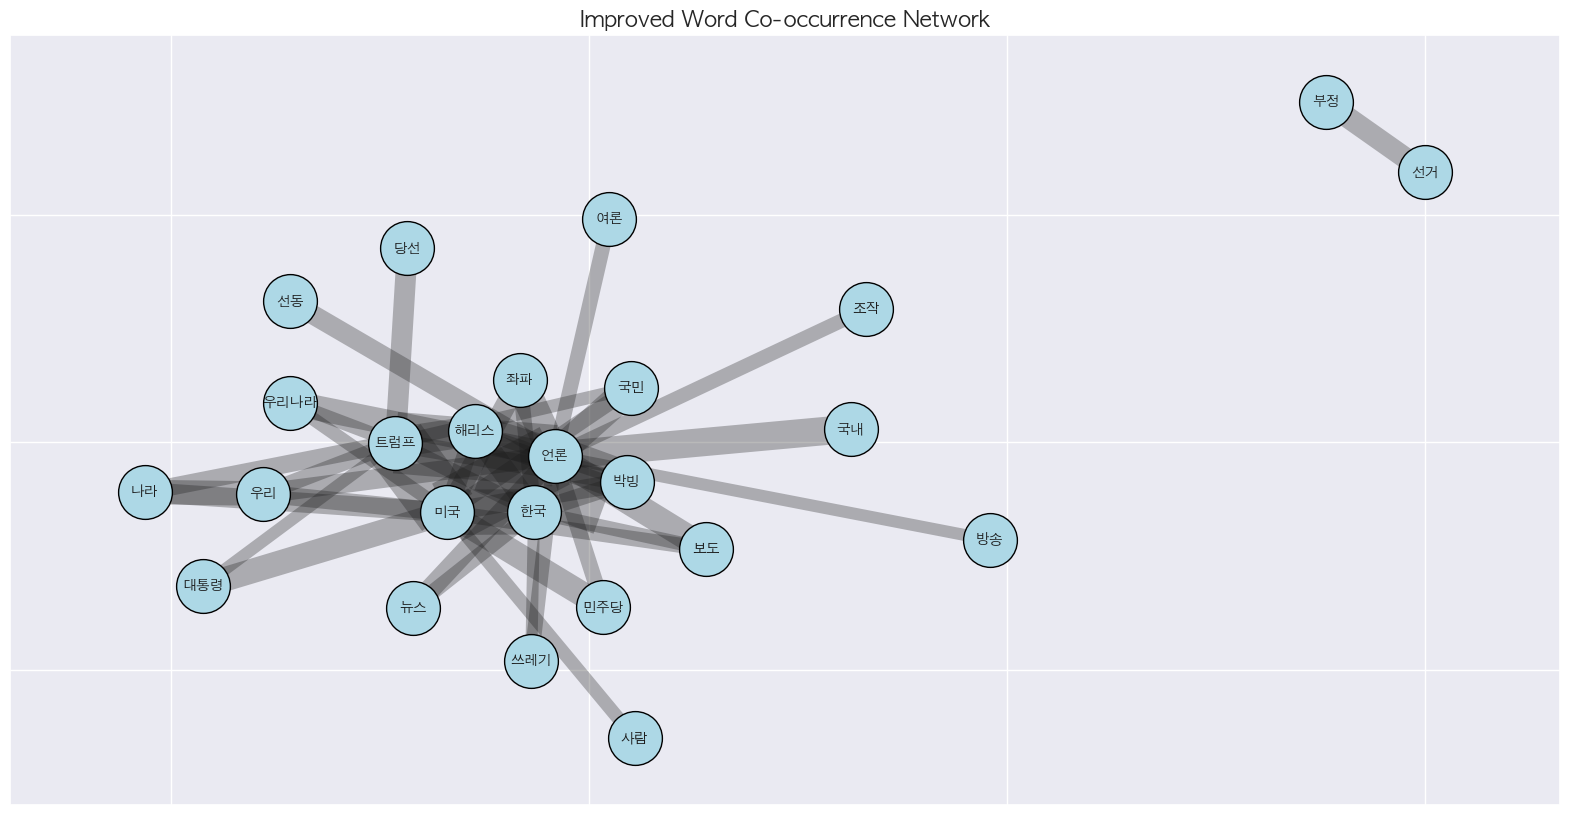

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
import pandas as pd

# Set AppleGothic font for Korean text
plt.rcParams['font.family'] = 'AppleGothic'

# Create a co-occurrence dictionary
co_occurrence = defaultdict(int)

# Iterate over tokenized comments
for tokens in df['Tokens'].dropna():
    unique_tokens = set(tokens)  # Remove duplicates within the same comment
    for word_pair in itertools.combinations(unique_tokens, 2):  # Create unique word pairs
        co_occurrence[word_pair] += 1

# Convert to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence.items(), columns=['Word_Pair', 'Count'])

# Apply a threshold to remove weak connections
min_cooccurrence = 5  # Only keep word pairs that appear together at least 5 times
co_occurrence_df = co_occurrence_df[co_occurrence_df['Count'] >= min_cooccurrence]

# Keep only the top N most frequently mentioned words
top_n_words = 30
word_counts = pd.Series(itertools.chain.from_iterable(df['Tokens'].dropna())).value_counts()
most_common_words = set(word_counts.head(top_n_words).index)

# Filter edges to include only connections between frequent words
filtered_edges = co_occurrence_df[
    co_occurrence_df['Word_Pair'].apply(lambda pair: pair[0] in most_common_words and pair[1] in most_common_words)
]

# Keep only the top 50 strongest connections
filtered_edges = filtered_edges.sort_values(by='Count', ascending=False).head(50)

# Create a graph
G = nx.Graph()

# Add edges and nodes with weight (co-occurrence count)
for word1, word2 in filtered_edges['Word_Pair']:
    count = filtered_edges.loc[filtered_edges['Word_Pair'] == (word1, word2), 'Count'].values[0]
    G.add_edge(word1, word2, weight=count)

# Draw the graph
plt.figure(figsize=(20, 10))

# Improved layout with better spacing
pos = nx.spring_layout(G, k=1.8)  # Increase spacing between nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue', edgecolors='black')

# Draw edges with varying thickness and transparency
edges = nx.draw_networkx_edges(G, pos, width=[d['weight'] / 3 for (u, v, d) in G.edges(data=True)], alpha=0.3)

# Draw labels with a larger font
nx.draw_networkx_labels(G, pos, font_size=10, font_family="AppleGothic", font_weight="bold")

# Show the graph
plt.title("Improved Word Co-occurrence Network", fontsize=16)
plt.show()

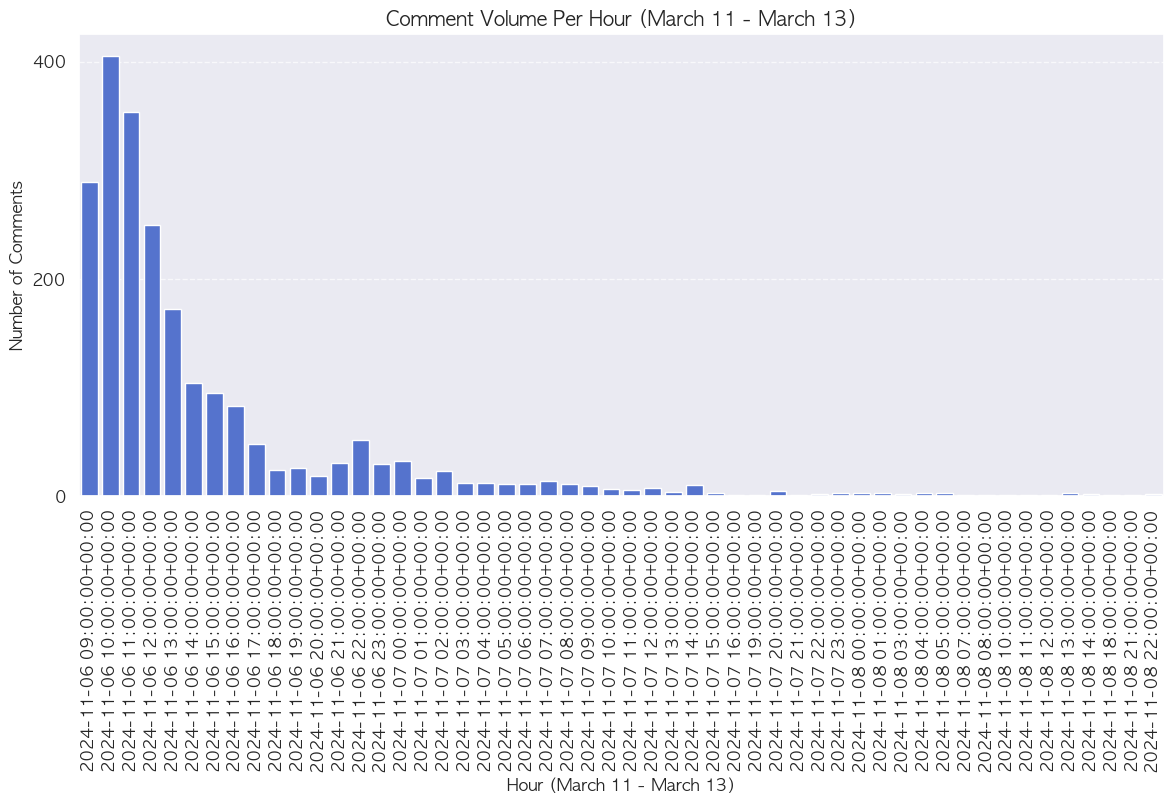

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'PublishedAt' to datetime format
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'], errors='coerce')

# Filter data between March 1 and March 3
start_date = "2024-11-06"
end_date = "2024-11-09"  # Changed end date to include March 3
df_filtered = df[(df['PublishedAt'] >= start_date) & (df['PublishedAt'] < end_date)]

# Create an hourly bin column
df_filtered['Hour_Bin'] = df_filtered['PublishedAt'].dt.floor('h')  # Round down to the nearest hour

# Count the number of comments per hour
hourly_comment_counts = df_filtered.groupby('Hour_Bin').size().reset_index(name='Comment Count')

# Plot using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_comment_counts['Hour_Bin'], y=hourly_comment_counts['Comment Count'], color='royalblue')

# Formatting
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hour (March 11 - March 13)', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.title('Comment Volume Per Hour (March 11 - March 13)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


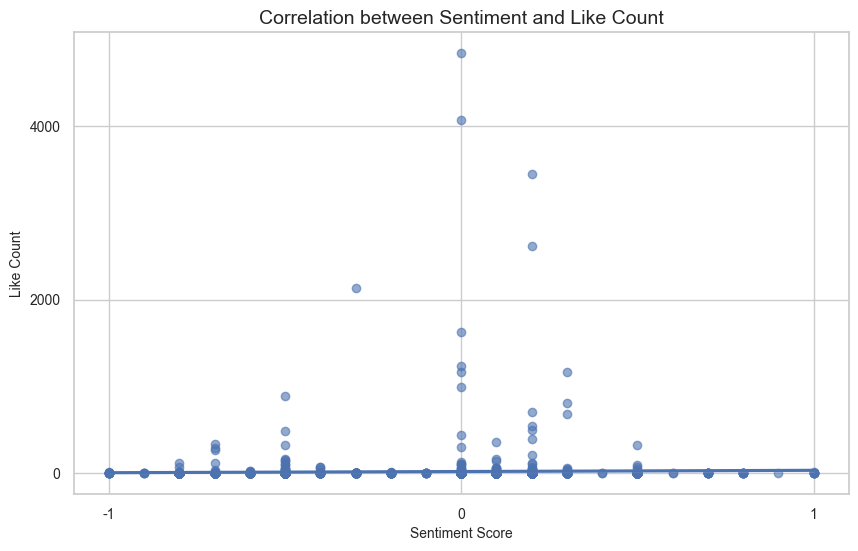

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.regplot(x='Sentiment', y='LikeCount', data=df, scatter_kws={'alpha':0.6})

# Set labels and title
plt.xlabel("Sentiment Score", fontsize=10)
plt.ylabel("Like Count", fontsize=10)
plt.title("Correlation between Sentiment and Like Count", fontsize=14)

# Show plot
plt.show()

In [38]:
df['Length'] = df['Comment'].apply(lambda x: len(x.split()))

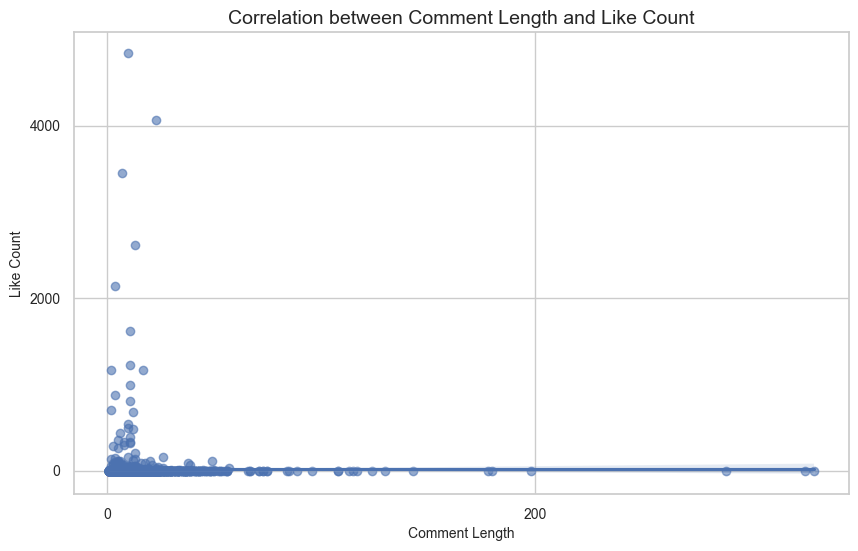

In [39]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.regplot(x='Length', y='LikeCount', data=df, scatter_kws={'alpha':0.6})

# Set labels and title
plt.xlabel("Comment Length", fontsize=10)
plt.ylabel("Like Count", fontsize=10)
plt.title("Correlation between Comment Length and Like Count", fontsize=14)

# Show plot
plt.show()

In [40]:
from IPython.display import display, Markdown
import emoji
from collections import Counter

# Function to extract emojis from text
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Extract and count emojis
all_emojis = df['Comment'].dropna().apply(lambda x: extract_emojis(str(x))).explode().dropna()

# Count occurrences of each emoji
emoji_counts = Counter(all_emojis)

# Convert to DataFrame and sort by frequency
emoji_df = pd.DataFrame(emoji_counts.items(), columns=['Emoji', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Convert emojis to Markdown format for larger display
emoji_df['Emoji'] = emoji_df['Emoji'].apply(lambda x: f"<span style='font-size:48px'>{x}</span>")

# Display in Markdown format (works in Jupyter)
display(Markdown(emoji_df.to_markdown(index=False)))

| Emoji                                  |   Frequency |
|:---------------------------------------|------------:|
| <span style='font-size:48px'>üòÇ</span> |          61 |
| <span style='font-size:48px'>üéâ</span> |          44 |
| <span style='font-size:48px'>ü•≥</span> |          43 |
| <span style='font-size:48px'>üëé</span> |          23 |
| <span style='font-size:48px'>üòÖ</span> |          21 |
| <span style='font-size:48px'>üòÆ</span> |          18 |
| <span style='font-size:48px'>‚ù§</span>  |          16 |
| <span style='font-size:48px'>üòä</span> |          11 |
| <span style='font-size:48px'>üëç</span> |          10 |
| <span style='font-size:48px'>üò©</span> |          10 |
| <span style='font-size:48px'>üò¢</span> |           8 |
| <span style='font-size:48px'>ü§£</span> |           7 |
| <span style='font-size:48px'>üòà</span> |           7 |
| <span style='font-size:48px'>üòé</span> |           6 |
| <span style='font-size:48px'>üí≠</span> |           4 |
| <span style='font-size:48px'>üë©</span> |           3 |
| <span style='font-size:48px'>üî•</span> |           3 |
| <span style='font-size:48px'>üßë</span> |           2 |
| <span style='font-size:48px'>üò±</span> |           2 |
| <span style='font-size:48px'>üèø</span> |           2 |
| <span style='font-size:48px'>üë®</span> |           2 |
| <span style='font-size:48px'>‚ñ∂</span>  |           1 |
| <span style='font-size:48px'>ü§¶</span> |           1 |
| <span style='font-size:48px'>üëÖ</span> |           1 |
| <span style='font-size:48px'>üå∂</span>  |           1 |
| <span style='font-size:48px'>üôÉ</span> |           1 |
| <span style='font-size:48px'>üï∑</span>  |           1 |
| <span style='font-size:48px'>üòÅ</span> |           1 |
| <span style='font-size:48px'>ü§ç</span> |           1 |
| <span style='font-size:48px'>‚ò∫</span>  |           1 |
| <span style='font-size:48px'>ü´°</span>  |           1 |
| <span style='font-size:48px'>üòî</span> |           1 |
| <span style='font-size:48px'>‚úÇ</span>  |           1 |
| <span style='font-size:48px'>üéÇ</span> |           1 |
| <span style='font-size:48px'>üç∑</span> |           1 |
| <span style='font-size:48px'>üè≥</span>  |           1 |
| <span style='font-size:48px'>üåà</span> |           1 |
| <span style='font-size:48px'>üöî</span> |           1 |
| <span style='font-size:48px'>üë∂</span> |           1 |
| <span style='font-size:48px'>ü™™</span>  |           1 |
| <span style='font-size:48px'>üòò</span> |           1 |
| <span style='font-size:48px'>üíã</span> |           1 |
| <span style='font-size:48px'>üèº</span> |           1 |
| <span style='font-size:48px'>üíµ</span> |           1 |
| <span style='font-size:48px'>‚ö†</span>  |           1 |
| <span style='font-size:48px'>‚ò™</span>  |           1 |
| <span style='font-size:48px'>ü¶∞</span> |           1 |
| <span style='font-size:48px'>üò°</span> |           1 |